In [74]:
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_mn_cal_curves(treatment):
    fig, axs = plt.subplots(1, 2, figsize = (16, 8))
    
    for idx, params in enumerate(zip(['crp', 'esr'], ['tab:blue', 'tab:orange'])):
        das_type, color = params
        
        axs[idx].plot((0, 1), (0, 1), alpha = 0.3, color = 'black', label = 'Perfect Calibration', linestyle = '--')
        
        apparent_res_struct = pickle.load(open(f'./data/results/{treatment}/class/{das_type}_{treatment}_class_apparent_eval.data', "rb"))
        
        prop_trues = np.array(apparent_res_struct['prop_trues'])
        prop_preds = np.array(apparent_res_struct['prop_preds'])
        
        for n, params in enumerate(zip(['tab:blue', 'tab:orange', 'tab:green'], ['Good', 'Moderate', 'None'])):
            color, label = params
            
            prop_true = np.mean(prop_trues[:, n, :], axis = 0)
            prop_pred = np.mean(prop_preds[:, n, :], axis = 0)
            
            axs[idx].plot(prop_pred, prop_true, label = label, color = color)
    
        boot_files = glob.glob(f'./data/results/{treatment}/class/bootstraps/{das_type}*.data')
        n_boot = len(boot_files)
    
        prop_preds = np.zeros((n_boot, 3, 10))
        prop_trues = np.zeros((n_boot, 3, 10))
    
        for boot_idx, boot_file in enumerate(boot_files):
            res_struct = pickle.load(open(boot_file, "rb"))
            
            raw_prop_trues = np.array(res_struct['raw_prop_trues'])
            raw_prop_preds = np.array(res_struct['raw_prop_preds'])
            
            for n in range(3):
                boot_prop_true = np.median(raw_prop_trues[:, n, :], axis = 0)
                boot_prop_pred = np.median(raw_prop_preds[:, n, :], axis = 0)
        
                prop_trues[boot_idx, n, :] = boot_prop_true
                prop_preds[boot_idx, n, :] = boot_prop_pred
        
        boot_pred = np.mean(prop_preds, axis = 0)
        boot_true = np.mean(prop_trues, axis = 0)
    
        std_pred = np.std(prop_preds, axis = 0)
        std_true = np.std(prop_trues, axis = 0)
        
        for n, color in enumerate(['tab:blue', 'tab:orange', 'tab:green']):
            axs[idx].plot(boot_pred[n, :], boot_true[n, :], linestyle = 'dotted', color = color)
        
        for n, color in enumerate(['tab:blue', 'tab:orange', 'tab:green']):
            boot_pred[n, 0] = boot_pred[n, 0] - std_pred[n, 0]
            boot_pred[n, -1] = boot_pred[n, -1] + std_pred[n, -1]
            
            axs[idx].fill_between(boot_pred[n, :], boot_true[n, :] + std_true[n, :], boot_true[n, :] - std_true[n, :], alpha = 0.1, color = color)
        axs[idx].title.set_text(das_type)
        axs[idx].set_xlabel('Predicted Outcome Probability')
        axs[idx].set_ylabel('Observed Outcome Probability')
        
    plt.legend()
    plt.savefig(f'mn_cal_curves_{treatment}.png', bbox_inches = 'tight')

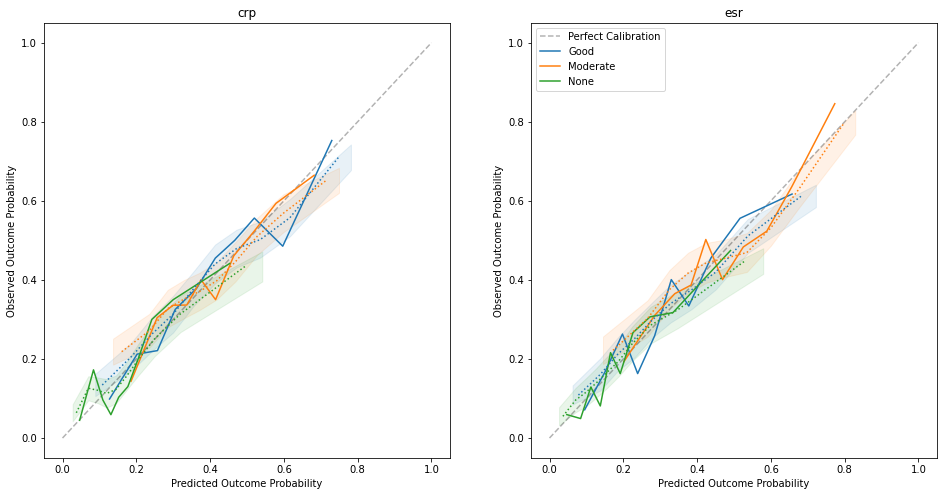

In [76]:
plot_mn_cal_curves('etanercept')

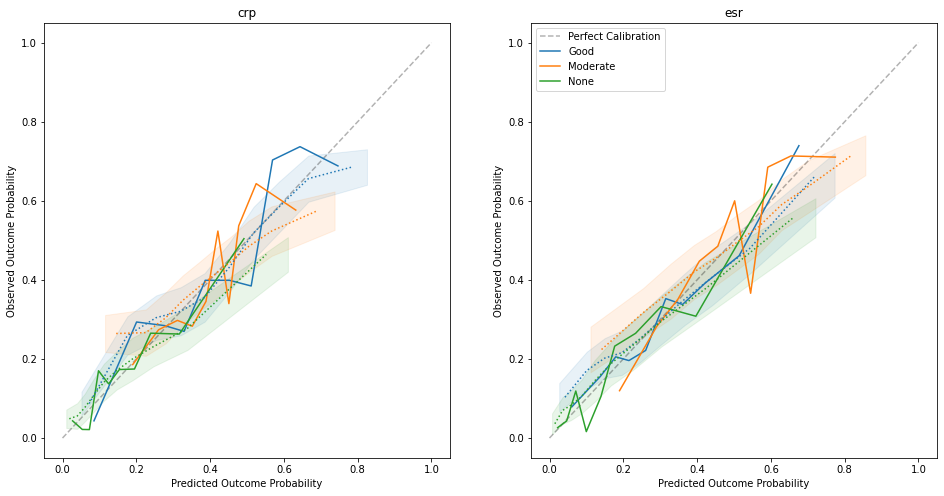

In [77]:
plot_mn_cal_curves('adalimumab')